# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [4]:
# TODO: view the shape of your data
print("Shape of transactions data:", transactions.shape)

Shape of transactions data: (1000000, 10)


In [23]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


In [24]:
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here

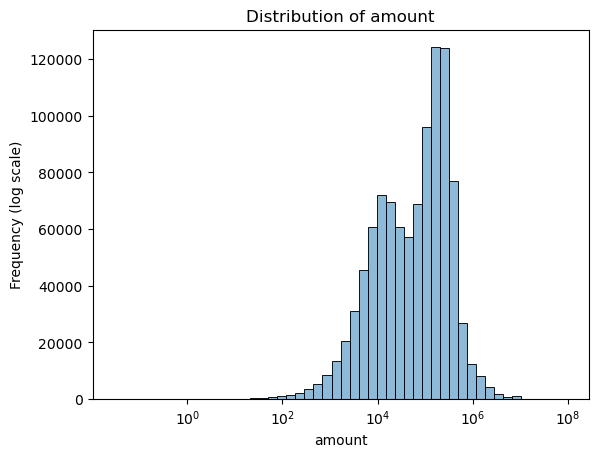

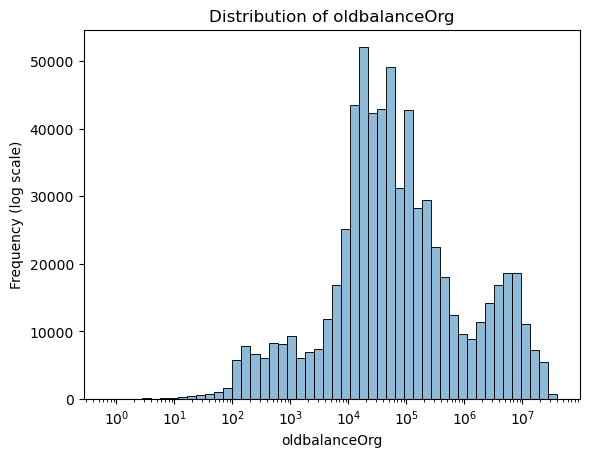

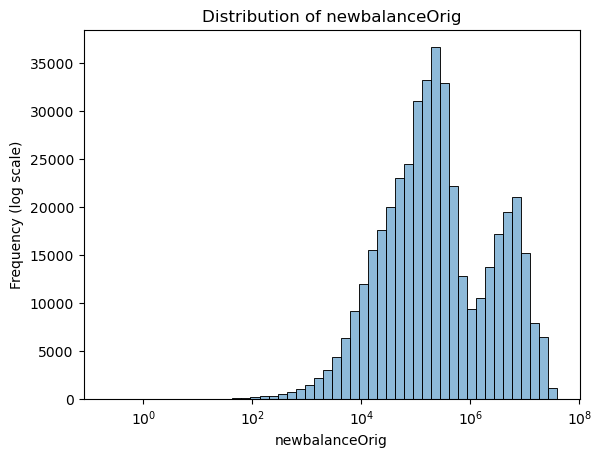

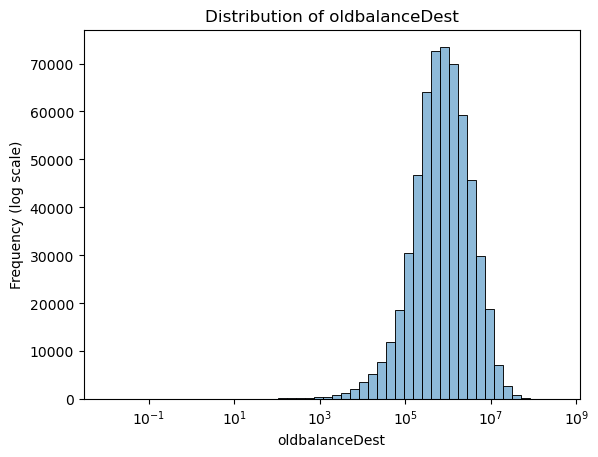

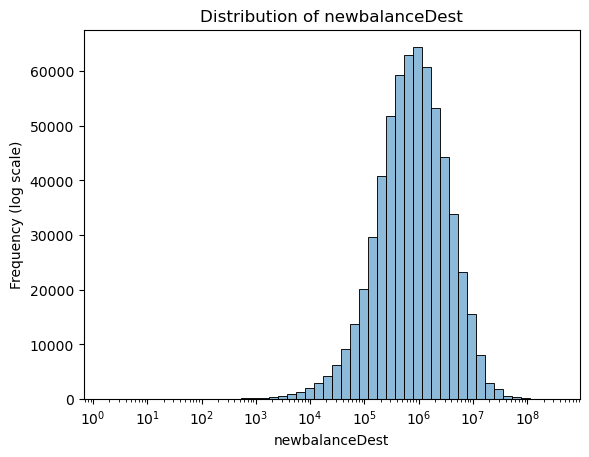

In [ ]:
# Histogram Plot distribution 

# Colums to plot
cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

# Plotting the distribution of each column
for col in cols:
    sns.histplot(transactions[col], bins=50,log_scale=True, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency (log scale)')
    plt.show()

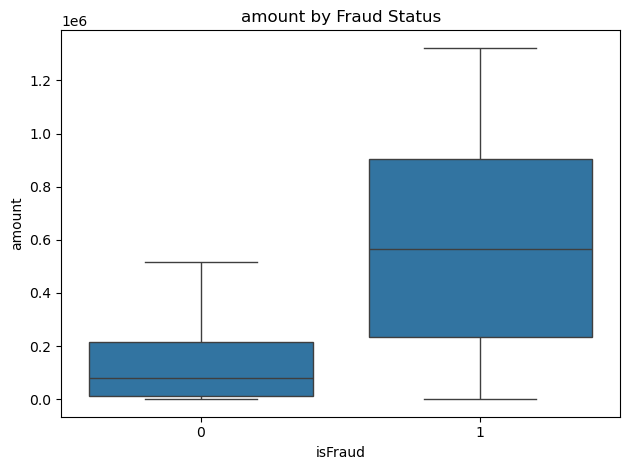

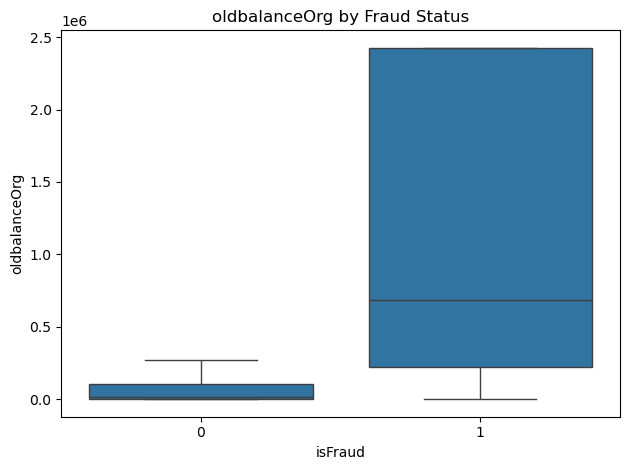

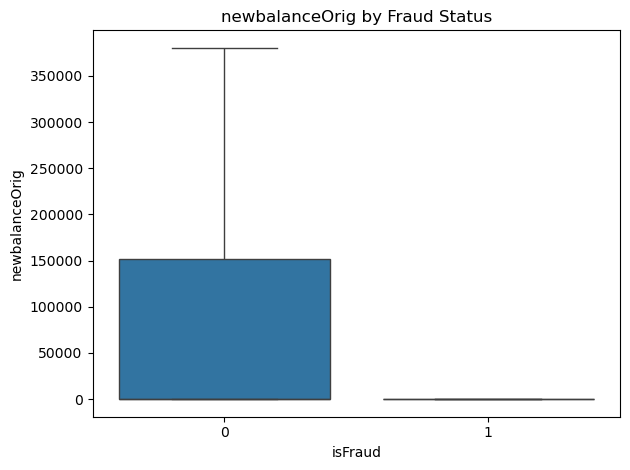

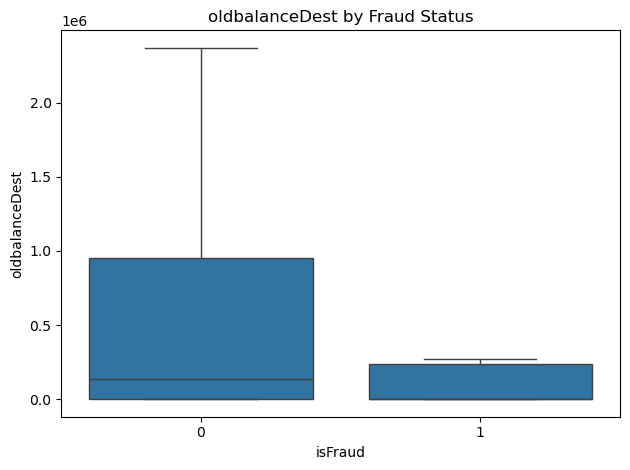

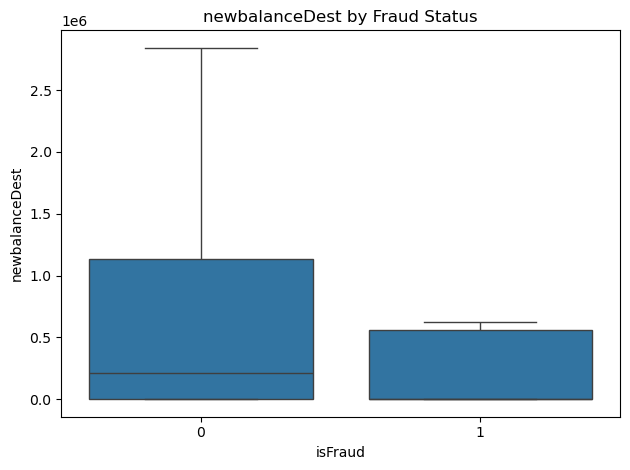

In [ ]:
# Box Plot
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    sns.boxplot(x='isFraud', y=col, data=transactions.sample(10000), showfliers=False)
    plt.yscale('log')  # log scale to show patterns better
    plt.title(f'{col} by Fraud Status')
    plt.tight_layout()
    plt.show()


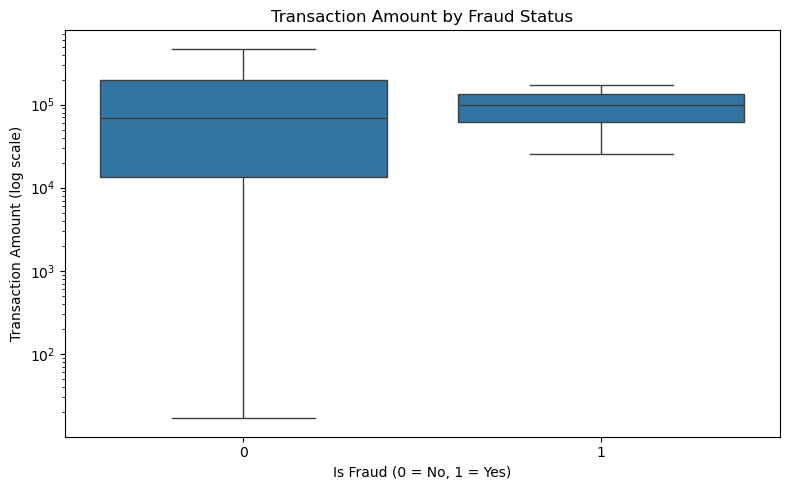

In [ ]:
# sample
df_box = transactions[['amount', 'isFraud']].copy()

# Drop non-numeric or NaN values in 'amount'
df_box = df_box[pd.to_numeric(df_box['amount'], errors='coerce').notnull()]
df_box['amount'] = df_box['amount'].astype(float)

# Sample for performance
df_box_sample = df_box.sample(3000, random_state=1)

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_box_sample, x='isFraud', y='amount', showfliers=False)
plt.yscale('log')
plt.title("Transaction Amount by Fraud Status")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount (log scale)")
plt.tight_layout()
plt.show()


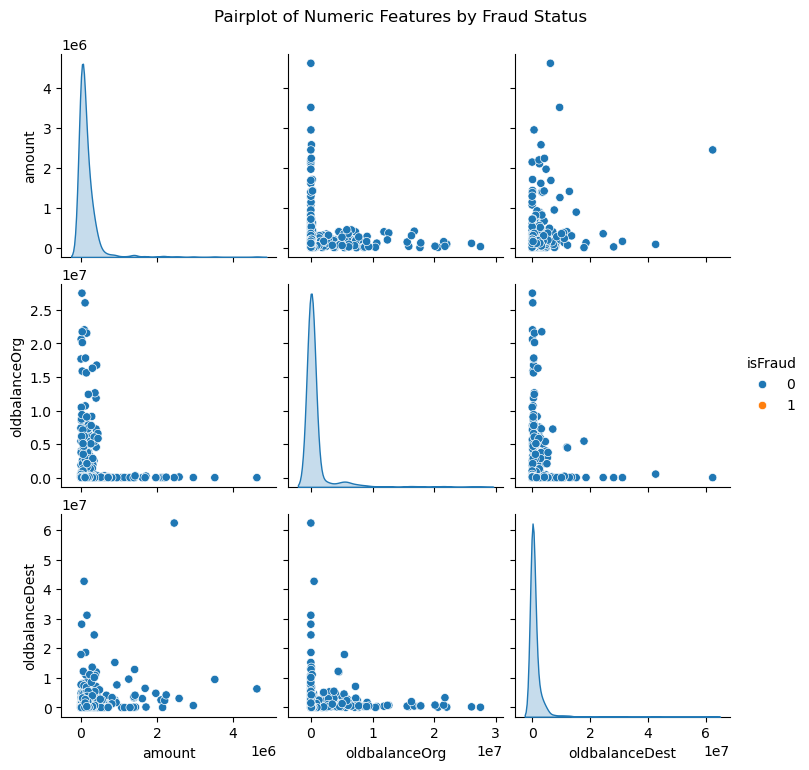

In [14]:
# Pairplot (small sample)

sns.pairplot(transactions.sample(1000), hue='isFraud', vars=['amount', 'oldbalanceOrg', 'oldbalanceDest'])
plt.suptitle('Pairplot of Numeric Features by Fraud Status', y=1.02)
plt.show()


### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

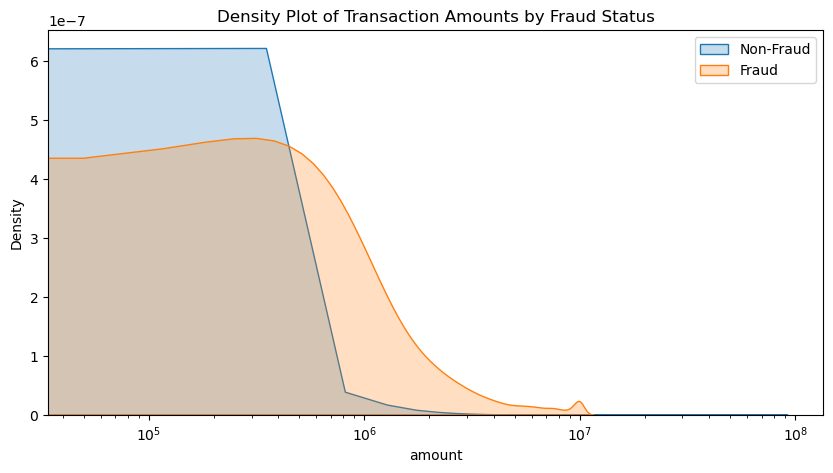

In [ ]:
# Show overlap for amount for fraud vs nonfraud transactions
plt.figure(figsize=(10, 5))
sns.kdeplot(data=transactions[transactions['isFraud'] == 0]['amount'], label='Non-Fraud', fill=True)
sns.kdeplot(data=transactions[transactions['isFraud'] == 1]['amount'], label='Fraud', fill=True)
plt.title("Density Plot of Transaction Amounts by Fraud Status")
plt.xscale('log')
plt.legend()
plt.show()


### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here